In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [86]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score

In [87]:
X,y=make_classification(n_samples=1000,n_classes=2, random_state=1)

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [89]:
# Creating a dummy model that predicts the negative class for all instances
dummy_model_prob = [0 for _ in range (len(y_test))]
print(dummy_model_prob[:10])

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [90]:
model=LogisticRegression()
model.fit(X_train,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [91]:
# prediction based on probability
model_prob=model.predict_proba(X_test)[:,1]

In [92]:
# Lets focus on the positive class only
model_prob=model.predict_proba(X_test)[:,1]

In [93]:
dummy_model_auc=roc_auc_score(y_test,dummy_model_prob)
model_auc=roc_auc_score(y_test,model_prob)
print(f"Dummy model AUC: {dummy_model_auc}")
print(f"Logistic Regression model AUC: {model_auc}")

Dummy model AUC: 0.5
Logistic Regression model AUC: 0.9108885464817668


In [94]:
dummy_fpr, dummy_tpr, _ = roc_curve(y_test, dummy_model_prob)
model_fpr, model_tpr, threshold = roc_curve(y_test, model_prob)

In [95]:
model_fpr, model_tpr

(array([0.        , 0.        , 0.        , 0.00757576, 0.00757576,
        0.01515152, 0.01515152, 0.02272727, 0.02272727, 0.03030303,
        0.03030303, 0.03787879, 0.03787879, 0.04545455, 0.04545455,
        0.0530303 , 0.0530303 , 0.06060606, 0.06060606, 0.06818182,
        0.06818182, 0.08333333, 0.08333333, 0.09090909, 0.09090909,
        0.09848485, 0.09848485, 0.11363636, 0.11363636, 0.12121212,
        0.12121212, 0.12878788, 0.12878788, 0.15909091, 0.15909091,
        0.18181818, 0.18181818, 0.18939394, 0.18939394, 0.20454545,
        0.20454545, 0.21969697, 0.21969697, 0.22727273, 0.22727273,
        0.24242424, 0.24242424, 0.31060606, 0.31060606, 0.32575758,
        0.32575758, 0.38636364, 0.38636364, 0.40909091, 0.40909091,
        0.41666667, 0.41666667, 0.53030303, 0.53030303, 0.53787879,
        0.53787879, 1.        ]),
 array([0.        , 0.00847458, 0.1440678 , 0.1440678 , 0.23728814,
        0.23728814, 0.28813559, 0.28813559, 0.36440678, 0.36440678,
        0.3728

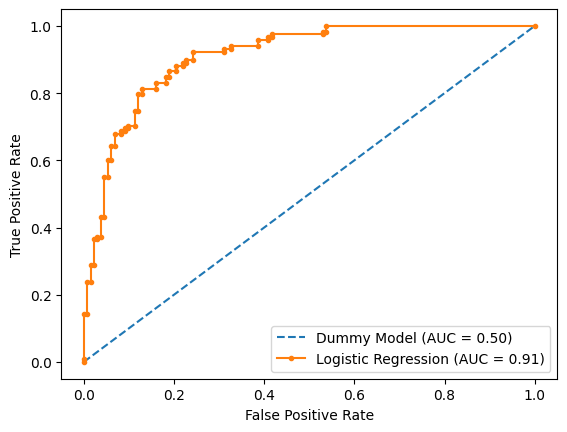

In [96]:
# plotting ROC curves
plt.plot(dummy_fpr, dummy_tpr, linestyle='--', label='Dummy Model (AUC = {:.2f})'.format(dummy_model_auc))
plt.plot(model_fpr, model_tpr, marker='.', label='Logistic Regression (AUC = {:.2f})'.format(model_auc))
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

C:\Users\Ilya\AppData\Local\Temp\ipykernel_30400\83035547.py:14: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


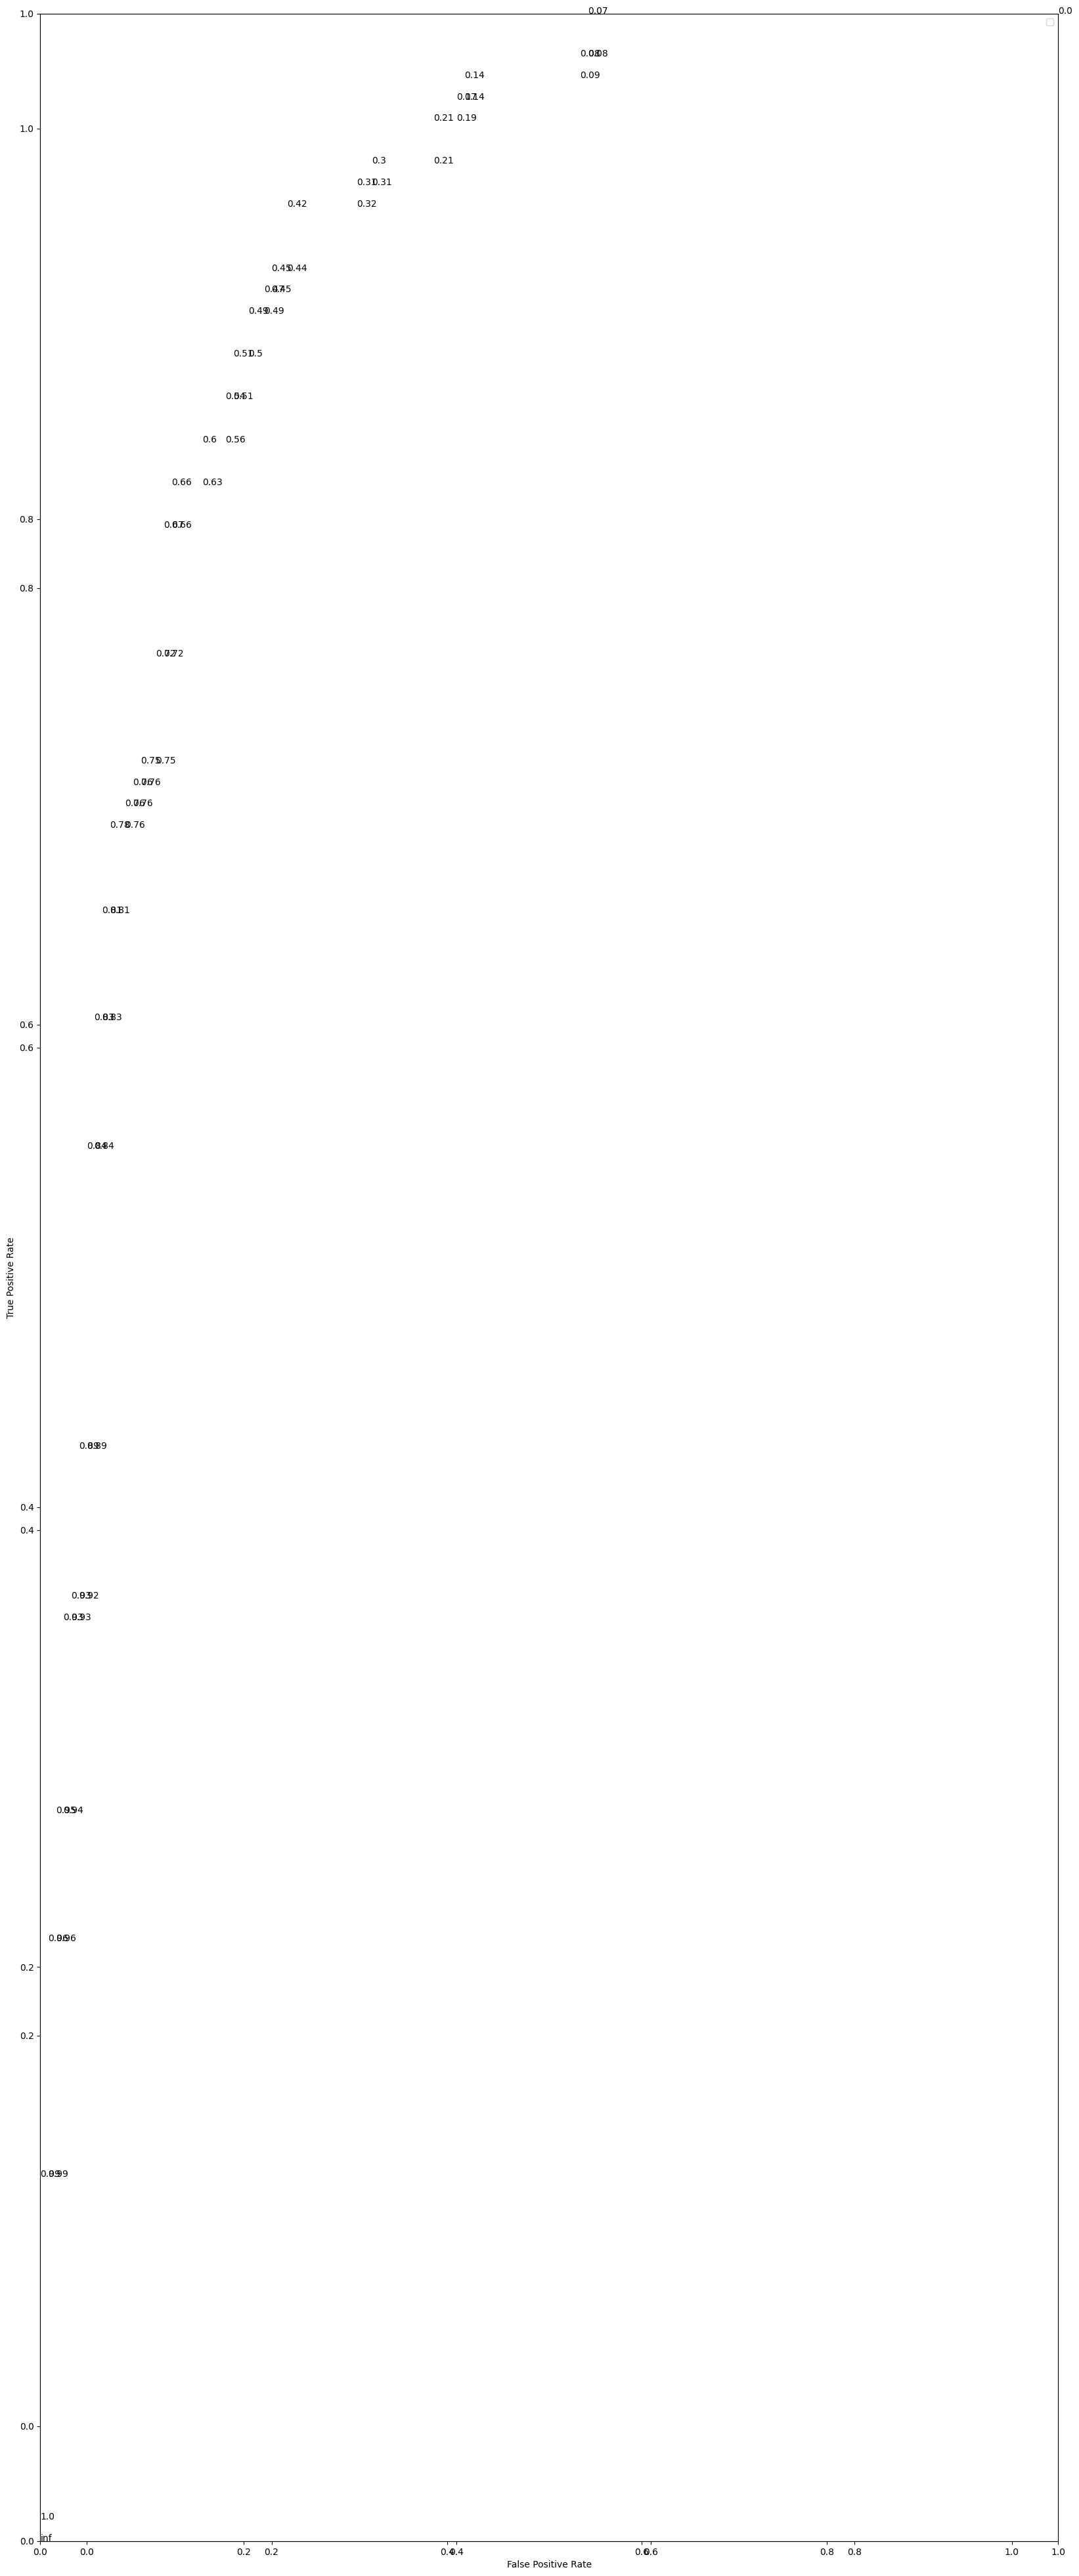

In [97]:
# plot th roc curve for the model
fig=plt.figure(figsize=(20,50))
plt.plot(dummy_fpr, dummy_tpr, linestyle='--', label='Dummy Model (AUC = {:.2f})'.format(dummy_model_auc))
plt.plot(model_fpr, model_tpr, marker='.', label='Logistic Regression (AUC = {:.2f})'.format(model_auc))
ax=fig.add_subplot(111)

for xyz in zip(model_fpr, model_tpr, threshold):
    ax.annotate('%s' % round(xyz[2],2), xy=(xyz[0], xyz[1]))

# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()